
# Project 2: Investigate a Dataset (TMDb movies)

## Prepared by: Lamia Alshawi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project, I analyzed a dataset and then communicate my findings about it. I used the Python libraries NumPy, pandas, and Matplotlib to make my analysis easier. 
I chose TMDb movie data, this dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including cast, release year, budget and revenue.

>Questions:
-	Which year was the highest number of movies released?
-	Which movies are the most profitable?
-	Which genres are the most popular?
-	What is the correlation between revenue and budget?
-	What is the average movie runtime from year to year?
-   Which actor was casted in the most movies?



In [1]:
# the import statements for all of the packages that i used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#this is to suppress an error warning i got while analyzing the correlation between revenue and budget

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Loaded the data and printed out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Dataset comprises of 10866 observations and 21 characteristics.
df.shape

(10866, 21)

In [5]:
# to find any missing values in each column I used info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# I used the describe() function to get a summary of statistics.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning 


### Frist impression

>We can see that the data are pretty clean but there are a lot of columns in the dataset that are not important to the analysis intend to do and therefore I decided to drop them. 
This includes: 
- imdb_id 
- tagline
- homepage 
- overview
- revenue_adj
- budget_adj
- production_companies 
- keywords

In [7]:
df.drop(['imdb_id', 'tagline', 'homepage', 'overview','budget_adj','revenue_adj', 'production_companies', 'keywords'], axis=1, inplace=True)

In [8]:
# i removed any missing values from cast and director columns
df = df[df['cast'].notna()]
df = df[df['director'].notna()]

In [9]:
# i also removed the rows where revenue and budget are equal to zero.
df = df.loc[df['budget'] * df['revenue'] != 0]

In [10]:
# finally, I used drop_duplicates to drop any duplicates.
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [11]:
#columns after cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3849 non-null   int64  
 1   popularity      3849 non-null   float64
 2   budget          3849 non-null   int64  
 3   revenue         3849 non-null   int64  
 4   original_title  3849 non-null   object 
 5   cast            3849 non-null   object 
 6   director        3849 non-null   object 
 7   runtime         3849 non-null   int64  
 8   genres          3849 non-null   object 
 9   release_date    3849 non-null   object 
 10  vote_count      3849 non-null   int64  
 11  vote_average    3849 non-null   float64
 12  release_year    3849 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 421.0+ KB


In [12]:
# Dataset after cleaning comprises of 3849 observations and 13 characteristics.
df.shape

(3849, 13)

<a id='eda'></a>
## Exploratory Data Analysis

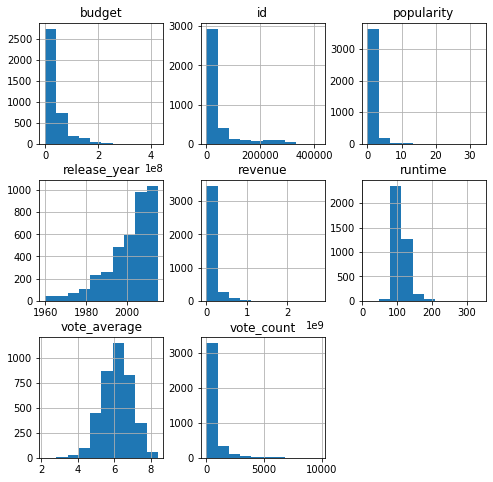

In [13]:
#first I want to view all colums with histogram
df.hist(figsize=(8,8));

### Q1: Which year was the highest number of movies released

Text(0.5, 1.0, 'Number of Movie Releases in Each Year ')

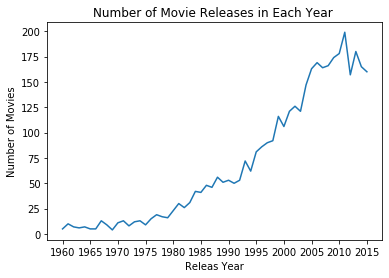

In [23]:
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
plt.xlabel('Releas Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movie Releases in Each Year ')

This plot shows the number of movie releases in each year. We can see that number of movies released has increased over the years.

### Q2: Which movies are the most profitable?

Text(0.5, 1.0, 'Top 5 Most Profitable Movies ')

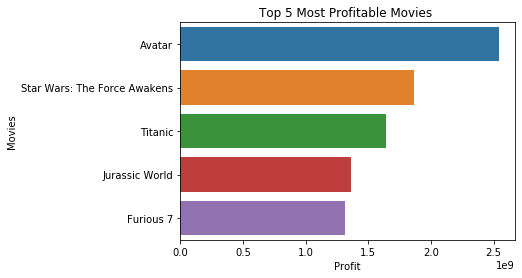

In [31]:
df['profit'] = df['revenue'] - df['budget']

#Top 5 most profitable movies, I stored the profit column in a new dataframe and sotred it in decending order

data = pd.DataFrame(df['profit'].sort_values(ascending = False))
data['original_title'] = df['original_title']
title = data['original_title']
sns.barplot(x=list(data['profit'][:5]),y=list(title[:5]))
plt.xlabel('Profit')
plt.ylabel('Movies')
plt.title('Top 5 Most Profitable Movies ')

This plot shows the most profitable movies, Avatar is the most profitable movie. 

### Q2: Which genres are the most popular?

Text(0.5, 1.0, 'Top 10 Most Popular Genres ')

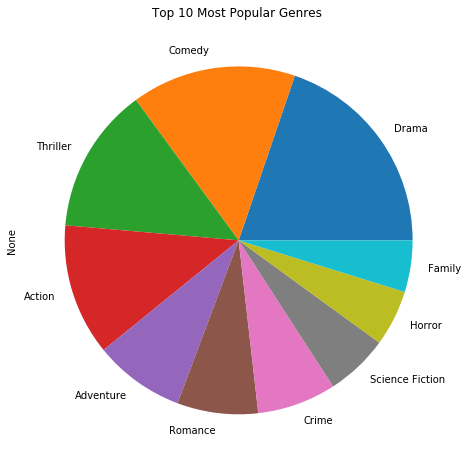

In [25]:
# i split the string "|" and return the count of each genre to get an accurate result 
def split_values(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    return data.value_counts()

split_genre = split_values('genres')

split_genre.head(10).plot(kind= 'pie',figsize = (8,8))

plt.title('Top 10 Most Popular Genres ')

Here we can see the most popular genres in movies, Drama is the most popular movie genre.

###  Q3: What is the correlation between revenue and budget? 

Text(0.5, 1.0, 'Revenue Vs. Budget')

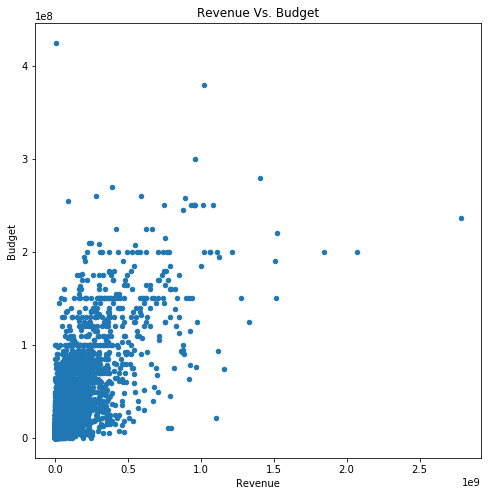

In [26]:
df.plot(x='revenue', y='budget', kind='scatter', figsize=(8,8))
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Revenue Vs. Budget')

In this plot we can see the relationship between the budget and the revenue and how does revenue change according to their budget.

### Q4: What is the average movie runtime from year to year?

Text(0.5, 1.0, 'Runtime Vs. Year')

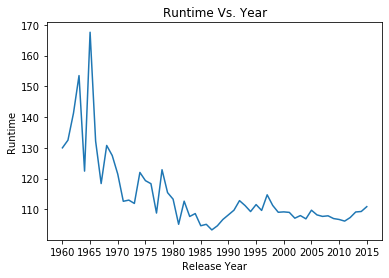

In [29]:
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Runtime Vs. Year')

We can see from this plot the movie runtime in each year and how it has decreased over the years.

### Q5: Which actor was casted in the most movies

Text(0.5, 1.0, 'Top 10 Most Casted Actors')

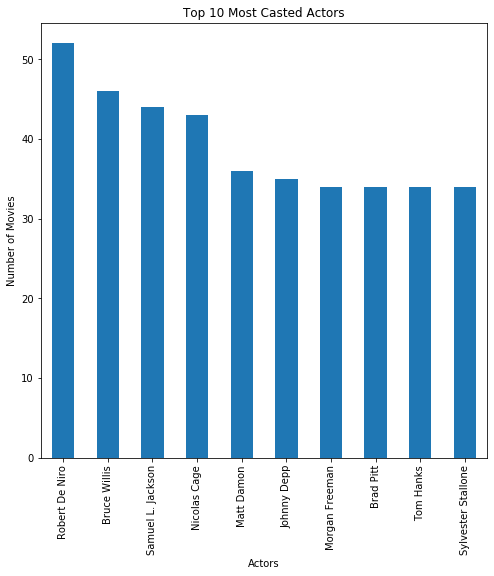

In [32]:
# I called the split_values function for spiltting and counting genres
actor = split_values('cast')

actor.iloc[:10].plot(kind='bar', figsize=(8,8))
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Casted Actors')

We see here which actor is casted in the highest number of movies.

<a id='conclusions'></a>
## Conclusions

>What I concluded from this dataset is the following:
- Drama is the most popular genre, followed by comedy and action. 
- The number of movie releases has increased over the years and highest number of movies released was in year 2011. 
- Avatar is the most profitable movie followed by Star Wars and Titanic. 
- Revenue is directly connected to the budget. Movies with higher budgets have shown a corresponding increase in the revenues.
- Average runtime of movies are decreasing year by year.
- Robert De Niro was casted in the most number of movies.

>The only limitations I feel was that the dataset contained null and zero values that created an obstacle for me. 
The null values stopped me many times when I was analyzing, and I had to go back and clean some more data. That is exactly why data cleaning is a necessary part before moving on to the dataset's investigation. 

### References
I mostly referred to Udacity’s knowledge portal for any problem I faced. Although, this website also helped me a lot with the visualization.
-	 https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
